In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Afficher mon dataset en entier
pd.set_option("max_columns", None)
pd.set_option("max_row", 20)

In [3]:
# Chargement du dataset
df = pd.read_excel ('Dataset-coeur.xlsx')

In [4]:
# visualisation du dataset
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


* Vu qu'il peut arriver que j'ai besoin du dataset d'origine, je décide alors de le duppliquer afin de travailler sur la copie.

In [5]:
df1=df.copy()
df1.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


#### RENOMINATION DE CERTAINES COLONES

* Pour une meilleure exploitation de mon jeu de données, je décide de renommer certaines colonnes pour bien les comprendre

In [6]:

df1.rename(columns={'TDT': 'Typ_douleur_thor', 
                  'PAR' : 'Pression_art_orepos',
                   'GAJ' : 'Glycémie_à_jeun',
                   'ECG' : 'Result_électrocard',
                    'FCMAX':'Fréqce_card_max',
                    'DEPRESSION ' : 'DEPRESSION'}, inplace=True)
df1.head()

,AGE,SEXE,Typ_douleur_thor,Pression_art_orepos,CHOLESTEROL,Glycémie_à_jeun,Result_électrocard,Fréqce_card_max,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


### EXAMEN DES VARIABLES QUALITATIVES INDIVIDUELLEMENT

In [7]:
var_quali=df1[['SEXE', 'Typ_douleur_thor', 'Result_électrocard', 'ANGINE', 'PENTE', 'Glycémie_à_jeun']]

### EXAMEN DES VARIABLES QUANTITATIVES INDIVIDUELLEMENT

In [8]:
var_quant = df1[['AGE', 'Pression_art_orepos', 'CHOLESTEROL',
       'Fréqce_card_max', 'DEPRESSION']]

# PRE-PROCESSING

### 1. Encodage des variables qualitatives 

In [9]:
for col in var_quali.columns:
    print(var_quali[col].value_counts())

homme    725
femme    193
Name: SEXE, dtype: int64
ASY    496
DNA    203
AA     173
AT      46
Name: Typ_douleur_thor, dtype: int64
Normal    552
LVH       188
ST        178
Name: Result_électrocard, dtype: int64
Non    547
Oui    371
Name: ANGINE, dtype: int64
Plat          460
Ascendant     395
Descendant     63
Name: PENTE, dtype: int64
0    704
1    214
Name: Glycémie_à_jeun, dtype: int64


In [10]:
def encodage(var_quali):
    code = {'homme':0,
            'femme':1,
            'ASY' : 0,
            'DNA' : 1,
            'AA' : 2,
            'AT':3,
            'Normal': 0,
            'LVH':1,
            'ST':2,
            'Non':0,
            'Oui':1,
            'Plat':0,
            'Ascendant':1,
            'Descendant':2
            }
    for col in var_quali.select_dtypes('object'):
        var_quali[col] = var_quali[col].map(code)
   
    return var_quali

In [11]:
encodage(var_quali)

,SEXE,Typ_douleur_thor,Result_électrocard,ANGINE,PENTE,Glycémie_à_jeun
0,0,2,0,0,1,0
1,1,1,0,0,0,0
2,0,2,2,0,1,0
3,1,0,0,1,0,0
4,0,1,0,0,1,0
...,...,...,...,...,...,...
913,0,3,0,0,0,0
914,0,0,0,0,0,1
915,0,0,0,1,0,0
916,1,2,1,0,0,0


### 2. Normalisation des variables quantitatives

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
var_quant

,AGE,Pression_art_orepos,CHOLESTEROL,Fréqce_card_max,DEPRESSION
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0
...,...,...,...,...,...
913,45,110,264,132,1.2
914,68,144,193,141,3.4
915,57,130,131,115,1.2
916,57,130,236,174,0.0


In [14]:
col_names = ['AGE', 'Pression_art_orepos', 'CHOLESTEROL', 'Fréqce_card_max', 'DEPRESSION']
features = var_quant[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,AGE,Pression_art_orepos,CHOLESTEROL,Fréqce_card_max,DEPRESSION
0,-1.433140,0.410909,0.825070,1.382928,-0.832432
1,-0.478484,1.491752,-0.171961,0.754157,0.105664
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432
3,-0.584556,0.302825,0.139040,-1.132156,0.574711
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432


In [15]:
var_quant=scaled_features
var_quant.head()

,AGE,Pression_art_orepos,CHOLESTEROL,Fréqce_card_max,DEPRESSION
0,-1.433140,0.410909,0.825070,1.382928,-0.832432
1,-0.478484,1.491752,-0.171961,0.754157,0.105664
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432
3,-0.584556,0.302825,0.139040,-1.132156,0.574711
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432


In [16]:
var_quali

,SEXE,Typ_douleur_thor,Result_électrocard,ANGINE,PENTE,Glycémie_à_jeun
0,0,2,0,0,1,0
1,1,1,0,0,0,0
2,0,2,2,0,1,0
3,1,0,0,1,0,0
4,0,1,0,0,1,0
...,...,...,...,...,...,...
913,0,3,0,0,0,0
914,0,0,0,0,0,1
915,0,0,0,1,0,0
916,1,2,1,0,0,0


#### Fusion des variables quanti et qualit pour former un nouveau dataframe

In [17]:
Newdf = pd.concat([var_quant,var_quali], axis=1, ignore_index=False)
Newdf.shape

(918, 11)

In [18]:
Newdf.head()

,AGE,Pression_art_orepos,CHOLESTEROL,Fréqce_card_max,DEPRESSION,SEXE,Typ_douleur_thor,Result_électrocard,ANGINE,PENTE,Glycémie_à_jeun
0,-1.433140,0.410909,0.825070,1.382928,-0.832432,0,2,0,0,1,0
1,-0.478484,1.491752,-0.171961,0.754157,0.105664,1,1,0,0,0,0
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432,0,2,2,0,1,0
3,-0.584556,0.302825,0.139040,-1.132156,0.574711,1,0,0,1,0,0
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432,0,1,0,0,1,0


## 3. Trainset, Testset

In [19]:
X = Newdf
y = df1[['CŒUR']]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
# voir contenu de X_train
x_train

,AGE,Pression_art_orepos,CHOLESTEROL,Fréqce_card_max,DEPRESSION,SEXE,Typ_douleur_thor,Result_électrocard,ANGINE,PENTE,Glycémie_à_jeun
378,1.749048,0.410909,-1.818435,0.793455,1.043759,0,0,0,1,0,1
356,-0.796702,-0.940145,-1.818435,-0.935665,0.574711,0,0,0,1,0,0
738,1.218683,1.491752,1.474513,0.557666,-0.081956,1,1,1,0,1,0
85,1.324756,0.410909,-0.546991,-1.682331,0.105664,0,0,0,1,0,0
427,0.582246,0.410909,-1.818435,-0.778472,0.105664,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
835,0.051881,-1.210356,0.367716,-0.424789,1.794236,0,0,0,1,0,0
192,-0.584556,-0.129513,0.422599,0.911350,-0.832432,0,2,0,0,1,0
629,0.370100,-0.237597,0.953129,0.872052,-0.832432,1,0,1,0,1,0
559,1.112610,0.086656,0.678717,-1.367945,2.919951,0,0,0,1,2,0


In [23]:
# voir contenu de y_train
x_test

,AGE,Pression_art_orepos,CHOLESTEROL,Fréqce_card_max,DEPRESSION,SEXE,Typ_douleur_thor,Result_électrocard,ANGINE,PENTE,Glycémie_à_jeun
306,0.157954,-0.940145,-1.818435,0.714859,-0.738623,0,0,0,0,0,1
711,1.324756,-0.669935,0.943982,0.557666,-0.457194,0,0,1,0,0,0
298,-0.266338,-1.210356,-1.818435,-1.760927,-0.832432,0,0,0,0,0,1
466,0.157954,-0.669935,-1.818435,-0.464087,1.512807,0,1,2,1,0,0
253,0.900464,0.410909,0.660423,0.596964,0.105664,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
909,1.006537,-0.453766,-0.016461,-0.031807,-0.832432,1,0,0,1,0,0
293,1.218683,-0.940145,-1.818435,-1.721629,-0.832432,0,0,0,1,0,0
761,-0.160265,-1.102272,0.285393,0.911350,-0.832432,0,0,0,0,1,0
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432,0,2,2,0,1,0


## MODELISATION 

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

### 1. RandomForest

In [25]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

In [26]:
model_random = RandomForestClassifier(random_state=0)

In [27]:
model_random.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [28]:
model_random.score(x_train, y_train)

1.0

In [29]:
y_pred = model_random.predict(x_test)

In [30]:
confusion_matrix(y_test, y_pred)

array([[60, 17],
       [10, 97]], dtype=int64)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        77
           1       0.85      0.91      0.88       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184



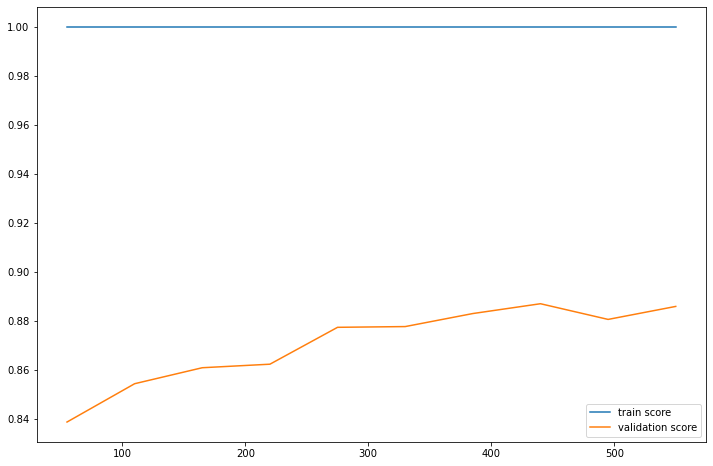

In [32]:
N, train_score, val_score = learning_curve(model_random, x_train, y_train,
                                          cv=4, scoring='f1',
                                          train_sizes=np.linspace(0.1, 1, 10))
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

* Le modele a une performance de 100% sur le jeu d'entrainement tandis qu'il a une performance de 85% sur le jeu de validation. Cela montre qu'il y a surapprentissage car ce fonctionnement est anormal.

## 2. Regression logistique 

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model_reg = LogisticRegression(random_state=0)

In [35]:
model_reg.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [36]:
model_reg.score(x_train, y_train)

0.8623978201634878

In [37]:
model_reg.score(x_test, y_test)

0.8369565217391305

In [38]:
y_pred = model_reg.predict(x_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        77
           1       0.85      0.88      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



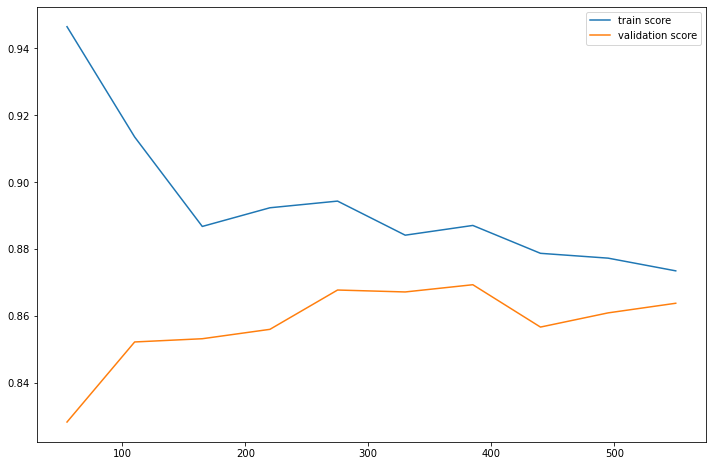

In [40]:
N, train_score, val_score = learning_curve(model_reg, x_train, y_train,
                                          cv=4, scoring='f1',
                                          train_sizes=np.linspace(0.1, 1, 10))
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

### SVM

- svm à noyau polynomial

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [42]:
classifier= SVC(kernel='poly',random_state=0)
model_svm_poly=classifier.fit(x_train, y_train)

In [43]:
y_pred=model_svm_poly.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[57 20]
 [11 96]]
              precision    recall  f1-score   support

           0       0.84      0.74      0.79        77
           1       0.83      0.90      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



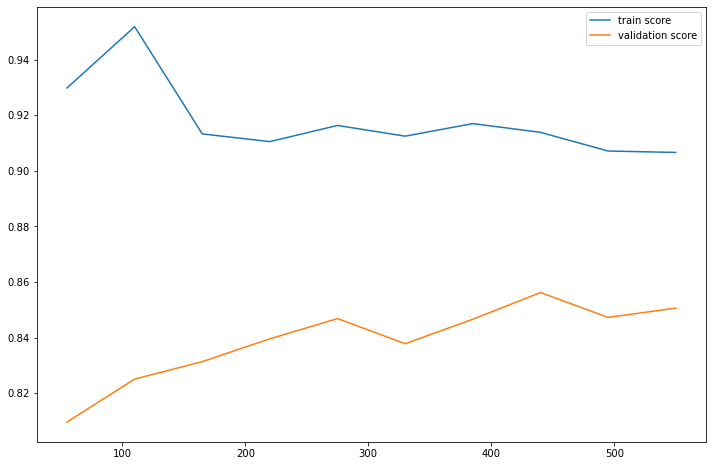

In [44]:
N, train_score, val_score = learning_curve(model_svm_poly, x_train, y_train,
                                          cv=4, scoring='f1',
                                          train_sizes=np.linspace(0.1, 1, 10))
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()